In [1]:
import os, time, itertools, imageio, pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
def lrelu(x, th=0.2):
    return tf.maximum(th * x, x)

def generator(x, y, isTrain=True, reuse=False):
    
    with tf.variable_scope('generator', reuse=reuse):
        w_init = tf.contrib.layers.xavier_initializer()
        g_input = tf.concat([x, y], 1)

        fc1 = tf.nn.relu(tf.layers.dense(g_input, 128, kernel_initializer=w_init))
        fc2 = tf.layers.dense(fc1, 784, kernel_initializer=w_init)
        generated_outputs = tf.nn.tanh(fc2)

        return generated_outputs

def discriminator(x, y, isTrain=True, reuse=False):
    
    with tf.variable_scope('discriminator', reuse=reuse):
        w_init = tf.contrib.layers.xavier_initializer()

        d_input = tf.concat([x, y], 1)

        fc1 = lrelu(tf.layers.dense(d_input, 128, kernel_initializer=w_init))
        fc2 = tf.layers.dense(fc1, 1, kernel_initializer=w_init)
        discriminator_outputs = tf.nn.sigmoid(fc2)

        return discriminator_outputs, fc2

In [3]:
x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))
z = tf.placeholder(tf.float32, shape=(None, 100))
isTrain = tf.placeholder(dtype=tf.bool)

In [4]:
batch_size = 100
lr = 0.0002
train_epoch = 100

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_set = (mnist.train.images - 0.5) / 0.5
train_label = mnist.train.labels


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
G_z = generator(z, y, isTrain)
D_real, D_real_logits = discriminator(x, y, isTrain)
D_fake, D_fake_logits = discriminator(G_z, y, isTrain, reuse=True)

D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real_logits, 
                                                                     labels=tf.ones([batch_size, 1])))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits,
                                                                     labels=tf.zeros([batch_size, 1])))
D_loss = D_loss_real + D_loss_fake

G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, 
                                                                labels=tf.ones([batch_size, 1])))


In [6]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator')

D_solver = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.5).minimize(D_loss, var_list=D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate=1e-3,beta1=0.5).minimize(G_loss, var_list=G_vars)

In [7]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [8]:
onehot = np.eye(10)

fixed_z_ = np.random.normal(0, 1, (25,100))
fixed_y_ = np.random.randint(0, 9, (25, 1))
fixed_y_ = onehot[fixed_y_.astype(np.int32)].squeeze()

def show_result(num_epoch):
    test_images = sess.run(G_z, {z: fixed_z_, y: fixed_y_, isTrain: False})

    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')

    plt.show()

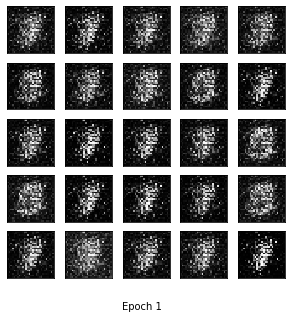

Iter: 0
D loss: 1.341
G_loss: 0.9166



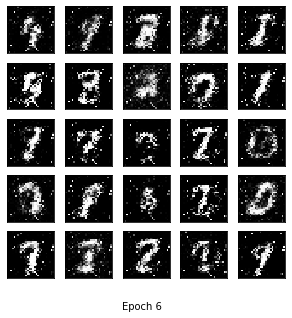

Iter: 5
D loss: 1.478
G_loss: 0.6599



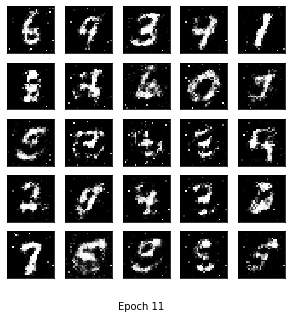

Iter: 10
D loss: 1.207
G_loss: 0.7642



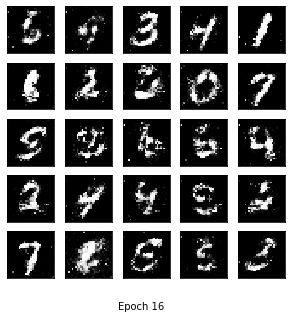

Iter: 15
D loss: 1.14
G_loss: 1.028



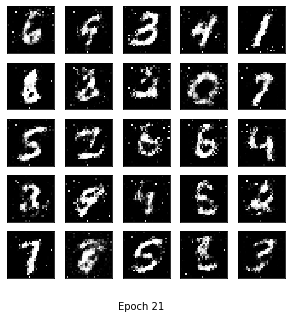

Iter: 20
D loss: 1.2
G_loss: 0.9822



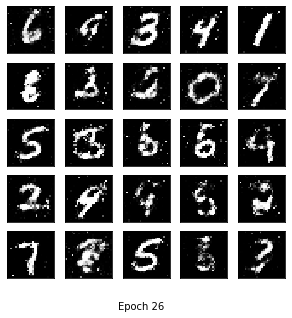

Iter: 25
D loss: 1.206
G_loss: 0.7646



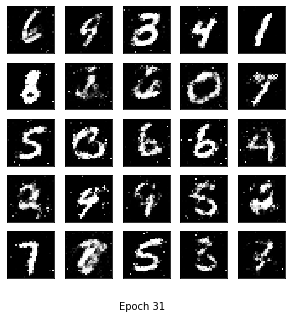

Iter: 30
D loss: 1.309
G_loss: 0.6425



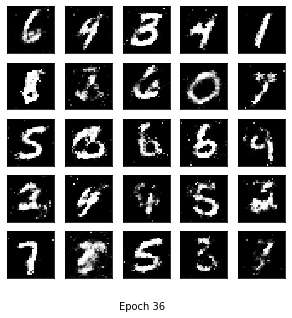

Iter: 35
D loss: 1.212
G_loss: 0.7448



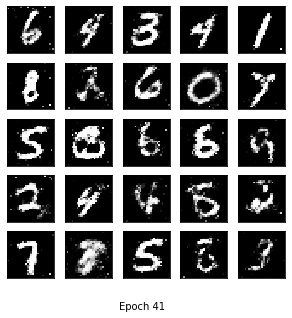

Iter: 40
D loss: 1.204
G_loss: 0.6819



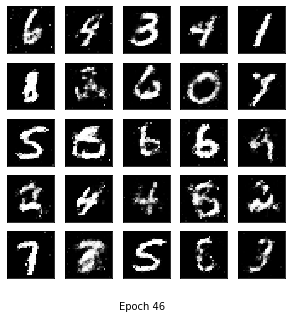

Iter: 45
D loss: 1.21
G_loss: 0.6449



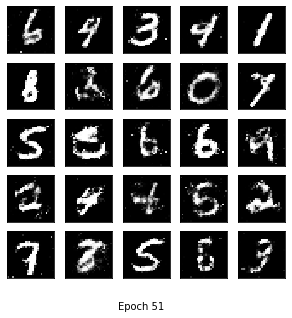

Iter: 50
D loss: 1.241
G_loss: 0.7117



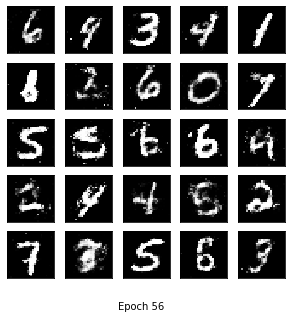

Iter: 55
D loss: 1.228
G_loss: 0.8363



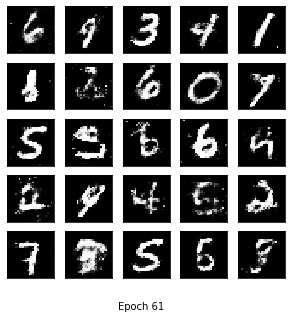

Iter: 60
D loss: 1.371
G_loss: 0.696



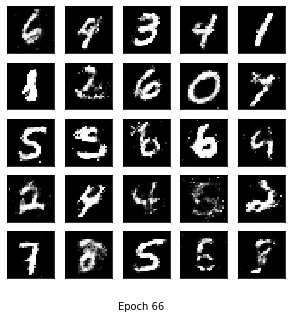

Iter: 65
D loss: 1.273
G_loss: 0.7154



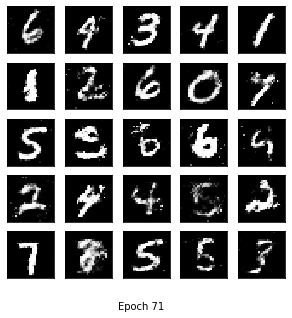

Iter: 70
D loss: 1.141
G_loss: 0.9876



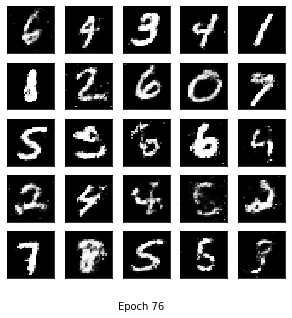

Iter: 75
D loss: 1.15
G_loss: 0.9056



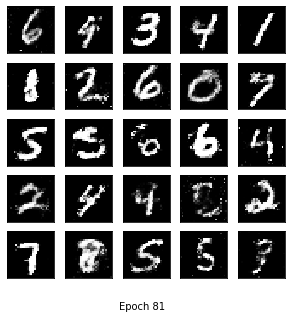

Iter: 80
D loss: 1.222
G_loss: 0.773



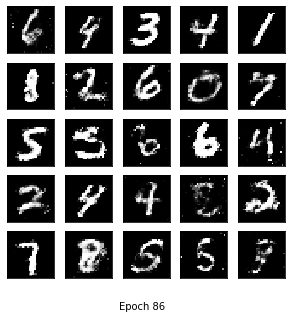

Iter: 85
D loss: 1.278
G_loss: 0.7404



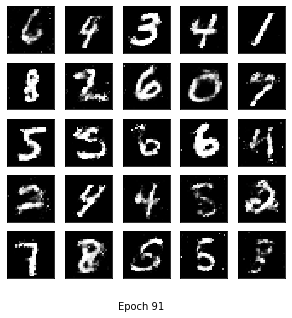

Iter: 90
D loss: 1.375
G_loss: 0.5327



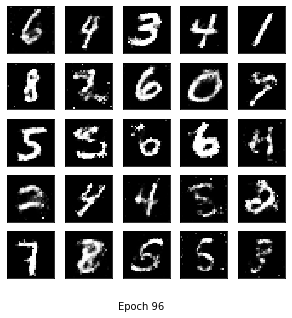

Iter: 95
D loss: 1.175
G_loss: 0.991



In [9]:
for it in range(100):
        
    for iter in range(mnist.train.num_examples // batch_size):

        x_ = train_set[iter*batch_size:(iter + 1)*batch_size]
        y_ = train_label[iter*batch_size:(iter + 1)*batch_size]

        z_ = np.random.normal(0, 1, (batch_size, 100))
        
        _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={x: x_, y: y_, z: z_, isTrain: True})
        
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={y: y_, z: z_, isTrain: True})

    if it % 5 == 0:
        
        show_result((it + 1))
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

In [10]:
condition = [3]*25 
condition = np.array(condition)

test_z = np.random.normal(0, 1, (25,100))
fixed_y = onehot[condition.astype(np.int32)].squeeze()

def show_result_test():
    test_images = sess.run(G_z, {z: test_z, y: fixed_y, isTrain: False})


    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(size_figure_grid*size_figure_grid):
        i = k // size_figure_grid
        j = k % size_figure_grid
        ax[i, j].cla()
        ax[i, j].imshow(np.reshape(test_images[k], (28, 28)), cmap='gray')

    plt.show()

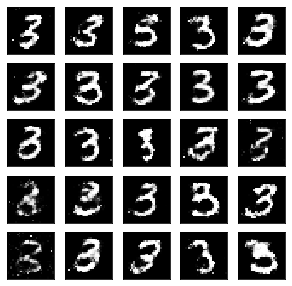

In [11]:
show_result_test() 

Note: I only trained for 100 epochs with a simple architecture so results may not that good 
      but if we train more with better architectures , the results will be impressive 